# Project description

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

You have:

- Server logs with data on Yandex.Afisha visits from January 2017 through December 2018
- Dump file with all orders for the period
- Marketing expenses statistics

You are going to study:

- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

# Step 1. Download the data and prepare it for analysis

- Store the data on visits, orders, and expenses in variables. 
- Optimize the data for analysis. 
- Make sure each column contains the correct data type.

In [16]:
import pandas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from math import factorial
from scipy import stats as st
from functools import reduce
import math

### Reading, optimizing, and examining visits dataframe

In [17]:
# Had to upload the file directly to Jupyter and change file name in order for python to recognize the file. 
#That is why it is named differently then the other two datasets
#optimizing data by changing device, uid, and source id to category and start ts and end ts to datetime64
# visits = pd.read_csv('visits.csv', dtype={'Device': 'category', 'Uid': 'category', 'Source Id': 'category'}, 
#                   parse_dates=['Start Ts', 'End Ts'])
visits = pd.read_csv('/datasets/visits_log_us.csv',
#visits = pd.read_csv('datasets/visits_log_us.csv',
                    dtype={'Device': 'category'},
                    parse_dates=['Start Ts', 'End Ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [18]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


- I see that there are two different devices. Touch and Desktop. 
- Two of the users here have the same Start Ts and End Ts. They didn't waste anytime and spent no time actually onsite.

In [19]:
visits['source_id']= visits['Source Id']

In [20]:
visits=visits.drop(['Source Id'], axis=1)

Created a new column source_id that will be identical to costs dataframe source_id column. Dropped the extra column of Source Id. Now the new column source_id will be able to help me merge the visits data and the costs data 

In [21]:
#changing columns to lowercase
visits.columns = visits.columns.str.lower()

- There are 359400 rows with 5 columns. Memory was 13.7+ MB
- Changed Device column from object to category and End Ts and Start Ts columns to datetime. Now memory is 19.3 MB
- There are no missing values
- Source Id and Uid were integers. I changed the Uid and Source Id to category because really it is just the id number of the person and the ad source they used. I will need to use it later in count and will be better to be used in.
- The columns are uppercase. I changed them to lowercase to be able to work better with all the data.

In [22]:
visits['source_id'].describe()

count    359400.000000
mean          3.750515
std           1.917116
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          10.000000
Name: source_id, dtype: float64

In [23]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

- There are 262567 instances of people visiting the Yandex.Afisha site through their desktop
- There are 96833 instances of people visiting the Yandex.Afisha site through a touch method

In [24]:
visits['start ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start ts, dtype: object

- There are 224303 different unique times that people visited Yandex.Afisha
- The top time visited was 2017-11-24 at 16:06:00 and it occured 19 times.
- The first time someone visited Yandex.Afisha was June 1, 2017 and the last time someone visited in this dataset was May 31, 2018. So therefore the project description of having logs from January 2017 to December 2018 is not correct and we have found the data like this.

In [25]:
visits['start ts'].value_counts()

2017-11-24 16:06:00    19
2017-11-24 17:21:00    15
2017-11-24 17:19:00    15
2018-05-31 10:01:00    15
2017-11-24 15:57:00    14
                       ..
2017-10-23 22:17:00     1
2018-01-24 20:19:00     1
2018-04-03 14:19:00     1
2017-12-14 10:36:00     1
2017-06-28 14:39:00     1
Name: start ts, Length: 224303, dtype: int64

November 24, 2017 was a popular day to visit the site

In [26]:
visits['end ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end ts, dtype: object

- There are 224760 different unique times that people ended their visit to Yandex.Afisha
- The top time was 2017-11-24 at 16:51:00 and it occured 23 times.
- The first time someone ended their session was June 1, 2017 and the last time someone ended their session in this dataset was June 1, 2018 which was a year later. 

In [27]:
visits['end ts'].value_counts()

2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:48:00    14
                       ..
2018-04-28 00:35:00     1
2018-03-29 12:00:00     1
2017-11-18 23:15:00     1
2017-11-15 23:44:00     1
2017-06-28 14:39:00     1
Name: end ts, Length: 224760, dtype: int64

In [28]:
visits['uid'].describe()

count    3.594000e+05
mean     9.202557e+18
std      5.298433e+18
min      1.186350e+13
25%      4.613407e+18
50%      9.227413e+18
75%      1.372824e+19
max      1.844668e+19
Name: uid, dtype: float64

In [29]:
visits['uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: uid, Length: 228169, dtype: int64

In [30]:
popular_visits = visits.query('uid == "12869801667763685675" ')
popular_visits.head()

,device,end ts,start ts,uid,source_id
181,desktop,2017-12-13 15:12:00,2017-12-13 15:08:00,12869801667763685675,5
446,desktop,2017-11-17 12:43:00,2017-11-17 12:42:00,12869801667763685675,2
2209,desktop,2018-03-05 16:14:00,2018-03-05 16:01:00,12869801667763685675,2
2834,desktop,2018-02-19 18:35:00,2018-02-19 18:31:00,12869801667763685675,5
3060,desktop,2018-01-22 16:42:00,2018-01-22 16:39:00,12869801667763685675,1


- There were 228169 visits by different people from June 1, 2017 until May 31, 2018
- The user that used the platform the most was 12869801667763685675 with 893 visits

### Reading, optimizing, and examining orders dataframe

In [31]:
# orders = pd.read_csv('B:\Yandex\projects\Project6\orders_log_us.csv', parse_dates =['Buy Ts'], dtype={'Uid': 'category'})
orders = pd.read_csv('/datasets/orders_log_us.csv',
#orders = pd.read_csv('datasets/orders_log_us.csv',
                    parse_dates=['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [32]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [33]:
#changing columns to lowercase
orders.columns = orders.columns.str.lower()

- In orders there are 50415 rows with 3 columns, Memory was 1.2+ MB
- Memory is now 2.5 MB
- Buy Ts is now datetime
- Revenue is float
- Uid was integer but changed it to category because really it is just the id number of the person and will need to use it later in count but not with sum.
- Here also the columns are uppercase and I changed them to lowercase to work better with the data

- Uid is where I can merge the data. The first dataframe has when people signed up and the second dataframe has the information for those that ordered. So I can probably infer that only 50415 orders were made from the 359400 Uid in the first dataframe

In [34]:
orders['buy ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy ts, dtype: object

In [35]:
orders['buy ts'].value_counts()

2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2018-05-31 10:02:00    7
2017-11-24 17:36:00    7
2018-05-31 10:27:00    7
                      ..
2017-11-11 09:37:00    1
2018-01-14 17:49:00    1
2017-06-22 11:34:00    1
2018-02-14 19:50:00    1
2017-08-29 17:06:00    1
Name: buy ts, Length: 45991, dtype: int64

- The first and last dates of June 1, 2017 and June 1, 2018 coincide with the dataframe of visits where we have people visiting the website.
- May 31, 2018, the last date that we have purchases from may be the most popular date with it showing up 3 times at 9, 7, and 7 buys at different times during the day.

In [36]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [37]:
orders['revenue'].value_counts()

1.83       2552
2.44       2464
3.67       2421
1.22       2216
3.05       2041
           ... 
7.56          1
7.55          1
1236.28       1
14.27         1
107.55        1
Name: revenue, Length: 1149, dtype: int64

In [38]:
zero_revenue = orders[orders['revenue'] == 0]
zero_revenue.count()

buy ts     51
revenue    51
uid        51
dtype: int64

- minimum revenue was 0. Then there was no revenue. How can people have been able to buy on the site for 0? Was there a special sale? Seems 51 users who visited did not help Yandex.Afisha make a profit.
- The maximum a user spent on an order wsa 2633.28
- Most people spent less than 4.89 and that is a huge difference from 2633

In [39]:
popular_visits_orders = orders.query('uid == "12869801667763685675" ')
popular_visits_orders.head()

,buy ts,revenue,uid


- For all the 893 visits that 12869801667763685675 made to the site they didn't buy. Is something wrong with what they saw?

### Reading, optimizing, and examining costs dataframe

In [40]:
# costs = pd.read_csv('B:\Yandex\projects\Project6\costs_us.csv', parse_dates = ['dt'], dtype= {'source_id': 'category'})
costs = pd.read_csv('/datasets/costs_us.csv',
                   parse_dates=['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


- The costs dataframe has 2542 rows (dates) and 3 columns
- There are only 365 days in a year so having 2542 dates means that some dates had more ads being used.
- The columns are source_id, dt, and costs
- source_id can be used to make calculations in the costs dataframe with the visits dataframe
- source_id was integer but I can change it to category to use for our calculations.

In [41]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [42]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [43]:
costs['source_id'].describe()

count    2542.000000
mean        4.857199
std         3.181581
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        10.000000
Name: source_id, dtype: float64

- Only 364 unique dates? That one day less than a year. 
- First date June 1, 2017.
- Last date is May 31, 2018
- So really the information is for one whole year minus one day and not two years.
- There are 7 unique types of source ads

In [44]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

- Just by looking at the description of costs here the ads were more expensive than the revenue. However there were less ads being paid for than orders coming in. Only 2542 ads compared to 50415 orders
- The most expensive ad was 1788.28

### Conclusion

- Each dataframe was optimized to some level. I parsed the dates in all three dataframes. I changed object dtypes to category.
- I discovered that the data we have is from June 1, 2017 until June 1, 2018.
- There are 262567 instances of people visiting the Yandex.Afisha site through their desktop and 96833 via touch
- There are 224303 different unique times that people visited Yandex.Afisha and 224760 different unique times that people ended their visit to Yandex.Afisha
- Discovered that even if visits were many it did not necessarily mean that the user would buy something.
- Ad sources were more costly than revenue with a birds eye view but we will continue to check that as we continue through the data

### Getting date columns by month, week, day

In [45]:
# Getting dates from visits dataset
visits['visit_year'] = pd.DatetimeIndex(visits['start ts']).year
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')
visits['visit_week']  = pd.DatetimeIndex(visits['start ts']).week
visits['visit_date'] = pd.DatetimeIndex(visits['start ts']).date

In [46]:
orders['order_year'] = pd.DatetimeIndex(orders['buy ts']).year
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
orders['order_week']  = pd.DatetimeIndex(orders['buy ts']).week
orders['order_date'] = pd.DatetimeIndex(orders['buy ts']).date

In [47]:
costs['cost_year'] = pd.DatetimeIndex(costs['dt']).year
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs['cost_week'] = pd.DatetimeIndex(costs['dt']).week
costs['cost_date'] = pd.DatetimeIndex(costs['dt']).date

# Step 2. Make reports and calculate metrics:

## Product 

#### 1. How many people use it every day, week, and month? 

In [48]:
#How many use it every day on average
dau_total = visits.groupby('visit_date').agg({'uid': 'nunique'}).mean()
print(int(dau_total))

907


In [49]:
#How many use it every week on average
wau_total = visits.groupby(['visit_year', 'visit_week']).agg({'uid': 'nunique'}).mean()
print(int(wau_total))

5716


In [50]:
#How many use it every month on average
mau_total = visits.groupby(['visit_year', 'visit_month']).agg({'uid': 'nunique'}).mean()
print(int(mau_total))

23228


- Daily average users are 907
- Weekly average users are 5716
- Monthly average users are 23228

#### 2. How many sessions are there per day? (One user might have more than one session.) 

In [51]:
sessions_per_user = visits.groupby(['visit_week', 'visit_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

n_sessions  n_users  sessions_per_user
visit_week visit_date                                        
1          2018-01-01        1065      992           1.073589
           2018-01-02        1355     1265           1.071146
           2018-01-03        1317     1219           1.080394
           2018-01-04        1370     1260           1.087302
           2018-01-05        1092     1006           1.085487
...                           ...      ...                ...
52         2017-12-27        1444     1334           1.082459
           2017-12-28        1496     1377           1.086420
           2017-12-29        1315     1192           1.103188
           2017-12-30        1192     1106           1.077758
           2017-12-31         784      732           1.071038

[364 rows x 3 columns]

In [52]:
sessions_per_user.describe()

,n_sessions,n_users,sessions_per_user
count,364.000000,364.000000,364.000000
mean,987.362637,907.991758,1.082170
std,418.994796,370.513838,0.020876
min,1.000000,1.000000,1.000000
25%,635.500000,594.000000,1.070321
50%,1003.000000,921.000000,1.082488
75%,1280.000000,1173.000000,1.093876
max,4042.000000,3319.000000,1.217837


A user had 1.082170 session per day on average

#### 3. What is the length of each session? 

In [53]:
visits['session_duration_sec'] = (pd.to_datetime(visits['end ts']) - pd.to_datetime(visits['start ts'])).dt.seconds

print(visits['session_duration_sec'].mean()) 

643.506488592098


- Average session is 644 seconds

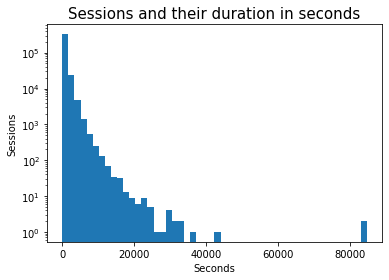

In [54]:
plt.hist(visits['session_duration_sec'], bins = 50, log = True)
plt.title("Sessions and their duration in seconds", fontsize=15)
plt.xlabel('Seconds')
plt.ylabel("Sessions")
plt.show()

In [55]:
print(visits['session_duration_sec'].mode())

0    60
dtype: int64


- Or a mode of 60

#### 4. How often do users come back?

In [56]:
dau_total = visits.groupby('visit_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['visit_year', 'visit_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['visit_year', 'visit_month']).agg({'uid': 'nunique'}).mean()

sticky_wau = (dau_total/wau_total)*100
sticky_mau = (dau_total/mau_total)*100

print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


- 15 percent of users came back weekly
- Only about 3 percent of users came back monthly

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3304df2210>],
      dtype=object)

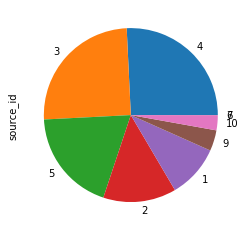

In [57]:
desktop_visits = visits.query('device == "desktop"')
(desktop_visits['source_id'].value_counts()).plot(subplots=True, kind='pie')

- Most of the visits came from sources 3 ,4 , and 5

In [58]:
desktop_visits['source_id'].value_counts(normalize=True)*100

4     25.761044
3     25.051511
5     19.069038
2     13.581676
1      9.864530
9      3.853873
10     2.805760
7      0.010664
6      0.001904
Name: source_id, dtype: float64

50% of the visits came from sources 4 and 3 from the desktop

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3305bdabd0>],
      dtype=object)

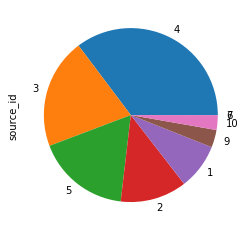

In [59]:
touch_visits = visits.query('device == "touch"')
(touch_visits['source_id'].value_counts()).plot(subplots=True, kind='pie')

- Most visits for touch also came from sources 3, 4, and 5

In [60]:
touch_visits['source_id'].value_counts(normalize=True)*100

4     35.271034
3     20.481654
5     17.386635
2     12.356325
1      8.488842
9      3.261285
10     2.744932
7      0.008262
6      0.001033
Name: source_id, dtype: float64

- 55% of the visits came from sources 3 and 4

## Sales 


#### 1. When do people start buying?

In [61]:
first_visits=visits.groupby('uid')['start ts'].min().reset_index()

In [62]:
first_visits.name='first_visits_date'

In [63]:
first_buy=orders.groupby('uid')['buy ts'].min().reset_index()

In [64]:
first_buy.name='first_orders_date'

In [65]:
firsts = first_visits.merge(first_buy, on='uid')

In [66]:
firsts.head()

,uid,start ts,buy ts
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [67]:
firsts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 3 columns):
uid         36523 non-null uint64
start ts    36523 non-null datetime64[ns]
buy ts      36523 non-null datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 1.1 MB


In [68]:
firsts['first_difference']= firsts['buy ts'] - firsts['start ts']

In [69]:
# Creating slice with unique users
users_conversion = firsts[['uid', 'first_difference']].drop_duplicates(subset = ['uid'])

In [70]:
#Calculating days to convertion
users_conversion['days_to_conversion'] = users_conversion['first_difference'] / np.timedelta64(1,'D')
users_conversion['days_to_conversion'] = users_conversion['days_to_conversion'].round().astype('int')

In [71]:
# Calculating minutes to convertion
users_conversion['mins_to_conversion'] = users_conversion['first_difference'] / np.timedelta64(1,'m')
users_conversion['mins_to_conversion'] = users_conversion['mins_to_conversion'].round().astype('int')

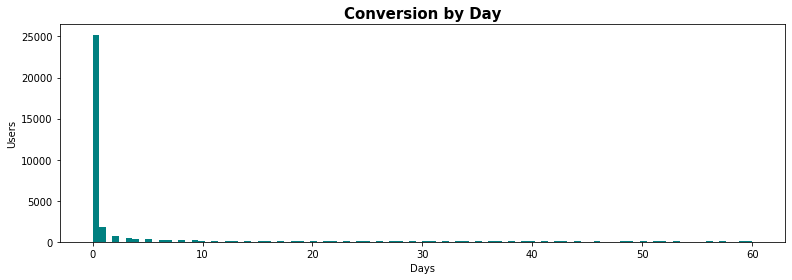

In [72]:
plt.figure(figsize=(13,4))
plt.hist(users_conversion['days_to_conversion'], bins=100, range=(0, 60), color='teal')
plt.title('Conversion by Day', fontsize=15,fontweight="bold")
plt.xlabel('Days')
plt.ylabel('Users')
plt.show()

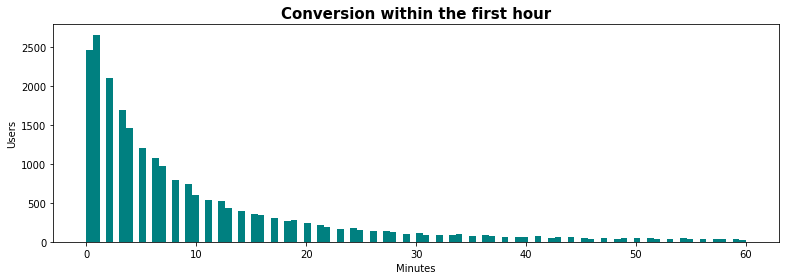

In [73]:
plt.figure(figsize=(13,4))
plt.hist(users_conversion['mins_to_conversion'], bins=100, range=(0, 60), color='teal')
plt.title('Conversion within the first hour', fontsize=15,fontweight="bold")
plt.xlabel('Minutes')
plt.ylabel('Users')
plt.show()

In [74]:
users_amount = firsts['first_difference'].value_counts().reset_index()

In [75]:
conversion_by_day = users_conversion['days_to_conversion'].value_counts().reset_index() 

In [76]:
conversion_by_day.columns = ['Day','Orders']

In [77]:
users_amount.columns = ['Time','Orders']

In [78]:
users_amount

,Time,Orders
0,0 days 00:01:00,2656
1,0 days 00:00:00,2455
2,0 days 00:02:00,2098
3,0 days 00:03:00,1685
4,0 days 00:04:00,1460
...,...,...
10556,62 days 19:37:00,1
10557,8 days 20:13:00,1
10558,1 days 07:41:00,1
10559,15 days 13:28:00,1


In [79]:
conversion_by_day

,Day,Orders
0,0,25217
1,1,1779
2,2,671
3,3,504
4,4,351
...,...,...
343,353,1
344,345,1
345,313,1
346,262,1


- After making these calculations I found that 25217 visitors started buying on the first day they visited
- 1779 visitors made an order on the next day and from there we see less visitors buying 
- I also calculated the days and the minutes and we can see that most of the people bought right away

#### 2. How many orders do they make during a given period of time? 

                   buy ts  revenue                   uid  order_year  \
13176 2017-10-17 10:16:00     7.94  18446167067214817906        2017   
35572 2018-02-18 19:34:00     9.78  18446156210226471712        2018   
42213 2018-03-26 22:54:00     4.22  18445601152732270159        2018   
9023  2017-09-25 15:56:00     0.12  18445407535914413204        2017   
8919  2017-09-24 23:48:00     0.24  18445407535914413204        2017   
...                   ...      ...                   ...         ...   
31462 2018-01-28 15:54:00     2.44      2464366381792757        2018   
12235 2017-10-11 18:33:00    73.33      2429014661409475        2017   
213   2017-06-03 10:13:00     1.22      1575281904278712        2017   
252   2017-06-03 17:39:00     1.83      1575281904278712        2017   
27944 2018-01-03 21:51:00     0.55       313578113262317        2018   

      order_month  order_week  order_date  
13176  2017-10-01          42  2017-10-17  
35572  2018-02-01           7  2018-02-18  
422

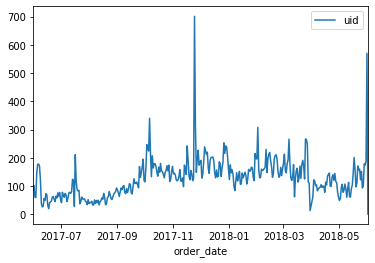

In [80]:
users_count = orders.groupby('order_date').agg({'uid': 'nunique'}).plot()
# print(users_count.sort_values(by = 'uid', ascending=False))
print(orders.sort_values(by = 'uid', ascending=False))

- Most users bought on November 24, 2017. Right in the middle of the our year of data at 701 users
- The second highest buying time was the last date of our data on May 31, 2018 with 570 users buying and the lone user on June 1, 2018 who actually signed on May 31, 2017 but bought after midnight.

                   buy ts  revenue                   uid  order_year  \
13176 2017-10-17 10:16:00     7.94  18446167067214817906        2017   
35572 2018-02-18 19:34:00     9.78  18446156210226471712        2018   
42213 2018-03-26 22:54:00     4.22  18445601152732270159        2018   
9023  2017-09-25 15:56:00     0.12  18445407535914413204        2017   
8919  2017-09-24 23:48:00     0.24  18445407535914413204        2017   
...                   ...      ...                   ...         ...   
31462 2018-01-28 15:54:00     2.44      2464366381792757        2018   
12235 2017-10-11 18:33:00    73.33      2429014661409475        2017   
213   2017-06-03 10:13:00     1.22      1575281904278712        2017   
252   2017-06-03 17:39:00     1.83      1575281904278712        2017   
27944 2018-01-03 21:51:00     0.55       313578113262317        2018   

      order_month  order_week  order_date  
13176  2017-10-01          42  2017-10-17  
35572  2018-02-01           7  2018-02-18  
422

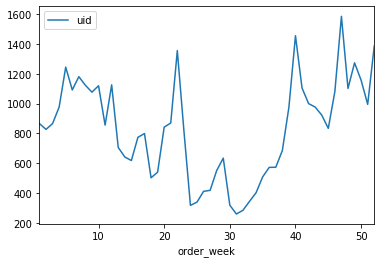

In [81]:
users_count = orders.groupby('order_week').agg({'uid': 'nunique'}).plot()
print(orders.sort_values(by = 'uid', ascending=False))

- The strongest buying week was Week 47 with 1586 users buying.
- The top five weeks are weeks 47, 40, 52, 22, and 49.
- The later weeks had more buys overall

                   buy ts  revenue                   uid  order_year  \
13176 2017-10-17 10:16:00     7.94  18446167067214817906        2017   
35572 2018-02-18 19:34:00     9.78  18446156210226471712        2018   
42213 2018-03-26 22:54:00     4.22  18445601152732270159        2018   
9023  2017-09-25 15:56:00     0.12  18445407535914413204        2017   
8919  2017-09-24 23:48:00     0.24  18445407535914413204        2017   
...                   ...      ...                   ...         ...   
31462 2018-01-28 15:54:00     2.44      2464366381792757        2018   
12235 2017-10-11 18:33:00    73.33      2429014661409475        2017   
213   2017-06-03 10:13:00     1.22      1575281904278712        2017   
252   2017-06-03 17:39:00     1.83      1575281904278712        2017   
27944 2018-01-03 21:51:00     0.55       313578113262317        2018   

      order_month  order_week  order_date  
13176  2017-10-01          42  2017-10-17  
35572  2018-02-01           7  2018-02-18  
422

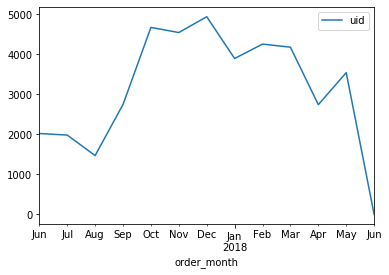

In [82]:
users_count = orders.groupby('order_month').agg({'uid': 'nunique'}).plot()
print(orders.sort_values(by = 'uid', ascending=False))

- The months of December, October, and November are big buy months.
- Holiday season maybe.
- We can see the months of June, July, and August at the bottom of the buy list here. Most probably because users were still learning about the product and not ready to buy until later.

### Creating Cohorts

In [83]:
first_order_date_by_customers = orders.groupby('uid')['order_date'].min() 

In [84]:
first_order_date_by_customers.name = 'first_order_date'

In [85]:
orders = orders.join(first_order_date_by_customers,on='uid')

In [86]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [87]:
cohort_grouped = orders.groupby('first_order_month').agg({'uid':'nunique','revenue':'sum'}).reset_index()
print(cohort_grouped)

   first_order_month   uid   revenue
0         2017-06-01  2023  24031.69
1         2017-07-01  1923  16127.92
2         2017-08-01  1370  11606.26
3         2017-09-01  2581  34676.32
4         2017-10-01  4340  27603.45
5         2017-11-01  4081  26098.99
6         2017-12-01  4383  33485.74
7         2018-01-01  3373  16663.13
8         2018-02-01  3651  16750.50
9         2018-03-01  3533  19273.41
10        2018-04-01  2276  11810.61
11        2018-05-01  2988  13925.76
12        2018-06-01     1      3.42


In [88]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'}).reset_index()
print(orders_grouped_by_cohorts.head())

  first_order_month order_month  revenue   uid
0        2017-06-01  2017-06-01  9557.49  2023
1        2017-06-01  2017-07-01   981.82    61
2        2017-06-01  2017-08-01   885.34    50
3        2017-06-01  2017-09-01  1931.30    54
4        2017-06-01  2017-10-01  2068.58    88


In [89]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']

In [90]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


In [91]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].head())
print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].tail())

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_order_month order_month  cohort_lifetime
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0
78        2018-06-01  2018-06-01                0


In [92]:
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,cohort_lifetime
0,2017-06,2017-06-01,9557.49,2023,0
1,2017-06,2017-07-01,981.82,61,1
2,2017-06,2017-08-01,885.34,50,2
3,2017-06,2017-09-01,1931.30,54,3
4,2017-06,2017-10-01,2068.58,88,4


#### 3. What is the average purchase size?

In [93]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

In [94]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns ='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


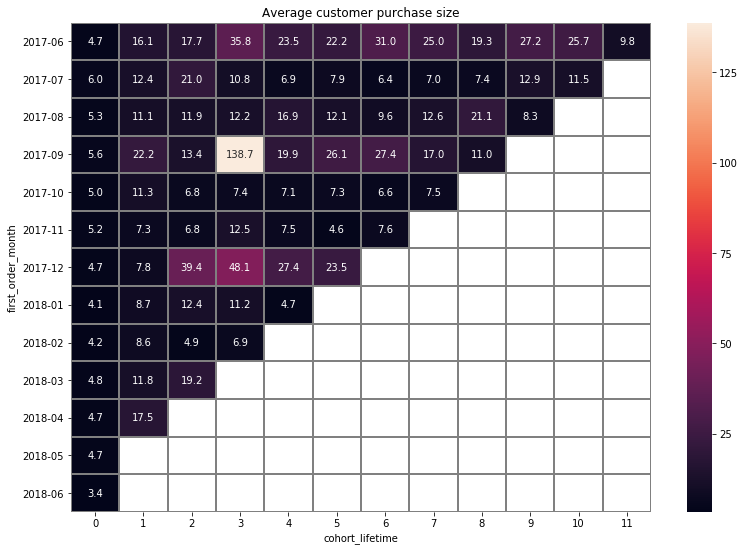

In [95]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(13, 9))
plt.title('Average customer purchase size')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')


- The June 2017 cohort started off slow from 4.7% then was in the 30s and 20s until the last month of May 31, 2018
- The July 2017 cohort started slow as well and its highest average purchase size was in September 2017 at 21%. Then it lowered and started picking up again the last months of our data at April and May 1t 12% and 11%.
- The August 2017 cohort hit 21% in April 2018 but remained below 20% for the rest.
- The September 2017 cohort had a strong percentage of 138% in December 2017 but remained lower than that with a low of 5.6 when they first started.
- The October 2017 cohort stayed around 7% except for its second month in November 2017 with 11%
- The November 2017 cohort stayed below 8% except for February 2018 with 12.5%
- The December 2017 cohort started slow with 4.7% but reached a high 48% in March 2018 but then dropped to less than 30%
- The January 2018 cohort only reached 12% in March 2018.
- The February 2018 cohort stayed below 10% its whole run.
- The March 2018 cohort rose to 11% in April and then 19% in May
- The April 2018 cohort came in at 4.7% but then had 17.5% in May
- The May 2018 cohort came at 4.7 % and the June cohort (that really visited in May but ordered a few hours into June came at 3.4%

- From all this data I can see that all the cohorts started slowly between 3-5 percent of average orders but some would eventually pick up with a stand out at 138.7% for the September cohort. Usually there is a steady drop in each cohort with some exceptions.

#### 4. How much money do they bring? (LTV)

In [96]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'uid']
cohort_sizes

,first_order_month,uid
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


 - The cohorts are the largest in months of October, November, and December and then start dropping significantly.
 - We stiil have that lone 1 in June 1 which is the visitor that came in May 31 and ordered in June

In [97]:
margin_rate = .5

- Can't calculate the margin rate with the data we have but the range in e-commerce is 20% to 50% so I chose to go with 50%

In [98]:
orders_ = pd.merge(orders,first_order_date_by_customers, on='uid')
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

- I merged the orders with the cohorts to check their revenue per month to get the gross profit per month

In [99]:
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

- Here we found the gross profit using the margin_rate
- Also created the different ages of the cohorts

In [100]:
report['ltv'] = report['gp'] / report['uid']

In [101]:
report

,first_order_month,uid,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,557.435,2,0.157780
75,2018-04-01,2276,2018-04-01,10600.69,5300.345,0,2.328798
76,2018-04-01,2276,2018-05-01,1209.92,604.960,1,0.265800
77,2018-05-01,2988,2018-05-01,13925.76,6962.880,0,2.330281


In [102]:
report.groupby('age')['revenue'].sum()

age
0     177184.47
1      14536.42
2      12184.64
3      20848.71
4       6964.10
5       6070.44
6       5090.48
7       3132.85
8       2304.45
9       1766.00
10      1455.02
11       519.62
Name: revenue, dtype: float64

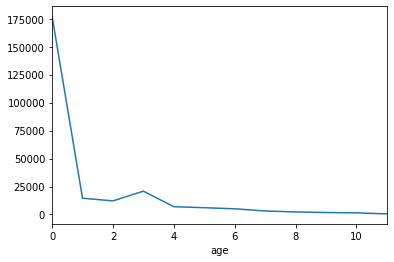

In [103]:
report.groupby('age')['revenue'].sum().plot()

- Of course the first Cohort brought in the most revenue and the 1, 2, and 3 were up there too. 
- after that it started to drop significantly because it was closer to the end of our data but also started having less visitors.

In [104]:
report.groupby('age')['ltv'].sum()

age
0     31.210935
1      2.505506
2      2.027491
3      3.722505
4      1.384566
5      1.167222
6      1.091332
7      0.743520
8      0.595332
9      0.470456
10     0.363467
11     0.128428
Name: ltv, dtype: float64

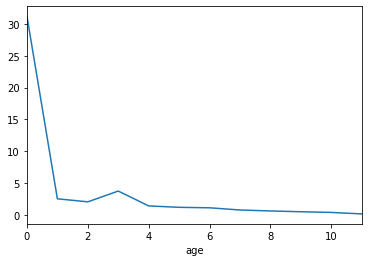

In [105]:
report.groupby('age')['ltv'].sum().plot()

- We can see that the ltv for the first Cohort was very big at 31 and they did very well staying strong 
- 1, 2, 3 were strong but not as strong as the first group
- 4, 5, 6 wer consistent at 1.0 to 1.4 and then again you can see the ltv dropping after that

### Marketing 

#### 1. How much money was spent? Overall/per source/over time 

In [106]:
total_costs =costs['costs'].sum()
print('Total money spent in marketing:', total_costs)

Total money spent in marketing: 329131.62


In [107]:
cost_per_source= costs.groupby('source_id')['costs'].sum().sort_values()
cost_per_source

source_id
9       5517.49
10      5822.49
1      20833.27
2      42806.04
5      51757.10
4      61073.60
3     141321.63
Name: costs, dtype: float64

- We can see that source 3, 4, 5 had the most costs and if we look back at the visits data we see that most visits came from these sources.
- Source 3 had the most money put into it with 141321.63
- The next was 4 at 61073.60 and then 5 at 51757.10

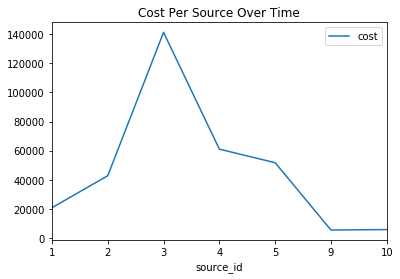

In [108]:
cost_per_source_graph = {"source_id":  ["1", "2", "3", "4","5","9","10"],

              "cost": [20833.27, 42806.04, 141321.63, 61073.60, 51757.10, 5517.49, 5822.49]
                  };

cost_per_source_graph = pd.DataFrame(data=cost_per_source_graph);

cost_per_source_graph.plot.line(x="source_id", title="Cost Per Source Over Time");

plot.show(block=True);                 

- We can see that source 3 was the peak of the marketing money put in and then the money started dropping.
- Where is source 6, 7, 8?

#### 2. How much did customer acquisition from each of the sources cost? This is desktop and touch separately?

In [109]:
marketing_cost_per_source= costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
marketing_cost_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


- Looks like source 3 cost the most at 141321.63 which was a significantly larger sum than any of the other sources with source 4 coming in at second by costing 61073.60 and then source 5 at 51757.10.
- As we saw earlier in the pie charts these 3 sources attracted the most visits.

In [110]:
yearly_costs=costs.groupby('cost_year')['costs'].sum().reset_index()
yearly_costs

,cost_year,costs
0,2017,187961.15
1,2018,141170.47


In [111]:
monthly_costs=costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_costs

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [112]:
costs

,source_id,dt,costs,cost_year,cost_month,cost_week,cost_date
0,1,2017-06-01,75.20,2017,2017-06-01,22,2017-06-01
1,1,2017-06-02,62.25,2017,2017-06-01,22,2017-06-02
2,1,2017-06-03,36.53,2017,2017-06-01,22,2017-06-03
3,1,2017-06-04,55.00,2017,2017-06-01,22,2017-06-04
4,1,2017-06-05,57.08,2017,2017-06-01,23,2017-06-05
...,...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018,2018-05-01,21,2018-05-27
2538,10,2018-05-28,21.26,2018,2018-05-01,22,2018-05-28
2539,10,2018-05-29,11.32,2018,2018-05-01,22,2018-05-29
2540,10,2018-05-30,33.15,2018,2018-05-01,22,2018-05-30


In [113]:
cost_difference_yearly= 187961.15 - 141170.47
print('There were more costs in 2017 than 2018 for marketing by: {:.2f}'.format(cost_difference_yearly))

There were more costs in 2017 than 2018 for marketing by: 46790.68


In [114]:
visits_per_source= visits.groupby(['source_id']).agg({'uid': 'nunique'}).reset_index()
visits_per_source

,source_id,uid
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


- And here we see that sources 3, 4, and 5 collet the most visits. with 4 at 83525, 3 at 74756, and 5 at 56974. The next best is source 2 at 26245 visits from source. the Sources that I have not seen until now 6 and 7 have 34 and 6 visits. No wonder they don't really exist

In [115]:
marketing_costs = marketing_cost_per_source.merge(visits_per_source, on='source_id')
marketing_costs['cac'] = marketing_costs['costs']/marketing_costs['uid']
marketing_costs.sort_values(by = 'cac', ascending = False)

,source_id,costs,uid,cac
2,3,141321.63,74756,1.890439
1,2,42806.04,26245,1.631017
0,1,20833.27,18999,1.096546
4,5,51757.10,56974,0.908434
3,4,61073.60,83525,0.731201
6,10,5822.49,8067,0.721766
5,9,5517.49,9264,0.595584


- Looks with the cac being 0.731201 for source 4 that it is doing much better than 3 which cost the most.
- Source 9 looks decent with 0.60 but it did not attract nearly as many customers as source 4.

#### 3. How worthwhile were the investments? (ROMI)

In [116]:
marketing_costs['romi'] = report['ltv']/marketing_costs['cac']
marketing_costs.sort_values(by= 'romi', ascending = False)

,source_id,costs,uid,cac,romi
0,1,20833.27,18999,1.096546,2.154226
6,10,5822.49,8067,0.721766,0.658412
3,4,61073.60,83525,0.731201,0.652810
5,9,5517.49,9264,0.595584,0.617463
4,5,51757.10,56974,0.908434,0.562799
1,2,42806.04,26245,1.631017,0.148781
2,3,141321.63,74756,1.890439,0.115750


- Source 1 has the best Return on marketing investment
- Source 9 and 4 whic have very different costs come second and third in romi.
- Sources 4 and 5 are very good with romi. But Source 3 which cost the most but had similar numbers of visitors to 4 and 5 is at the bottom of our list with source 2 being the least return on marketing investment.

In [117]:
cohort_costs = cohort_sizes.join(monthly_costs)

In [118]:
cohort_costs

,first_order_month,uid,cost_month,costs
0,2017-06-01,2023,2017-06-01,18015.00
1,2017-07-01,1923,2017-07-01,18240.59
2,2017-08-01,1370,2017-08-01,14790.54
3,2017-09-01,2581,2017-09-01,24368.91
4,2017-10-01,4340,2017-10-01,36322.88
5,2017-11-01,4081,2017-11-01,37907.88
6,2017-12-01,4383,2017-12-01,38315.35
7,2018-01-01,3373,2018-01-01,33518.52
8,2018-02-01,3651,2018-02-01,32723.03
9,2018-03-01,3533,2018-03-01,30415.27


In [119]:
cost_month_per_cohort = cohort_costs['costs']/ cohort_costs['uid']
cost_month_per_cohort

0      8.905091
1      9.485486
2     10.796015
3      9.441654
4      8.369327
5      9.288870
6      8.741809
7      9.937302
8      8.962758
9      8.608907
10     9.793225
11     7.437841
12          NaN
dtype: float64

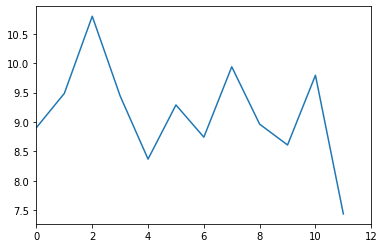

In [120]:
cost_month_per_cohort.plot()

- The costs for marketing were high the first three months and were not very worthwhile. The middle months saw the costs go down but then the costs went up again but the users started going down

In [121]:
visits_per_source_per_month= visits.groupby(['source_id', 'visit_month']).agg({'uid': 'nunique', }).reset_index()
visits_per_source_per_month

,source_id,visit_month,uid
0,1,2017-06-01,972
1,1,2017-07-01,1047
2,1,2017-08-01,794
3,1,2017-09-01,1395
4,1,2017-10-01,2170
...,...,...,...
97,10,2018-01-01,925
98,10,2018-02-01,1088
99,10,2018-03-01,1167
100,10,2018-04-01,603


In [122]:
report['ltv'] = report['gp'] / report['uid']
output = report.pivot_table(
 index='first_order_month',
 columns='age',
 values='ltv',
 aggfunc='mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0,0,0,1,0,0,0,0,0,0,0
2017-07-01,3.0,0,0,0,0,0,0,0,0,0,0,
2017-08-01,3.0,0,0,0,0,0,0,0,0,0,,
2017-09-01,3.0,1,0,2,0,0,0,0,0,,,
2017-10-01,3.0,0,0,0,0,0,0,0,,,,
2017-11-01,3.0,0,0,0,0,0,0,,,,,
2017-12-01,2.0,0,0,1,0,0,,,,,,
2018-01-01,2.0,0,0,0,0,,,,,,,
2018-02-01,2.0,0,0,0,,,,,,,,


In [123]:
report_2 = pd.merge(report, monthly_costs, left_on='first_order_month',
right_on='cost_month')
report_2['cac'] = report_2['costs'] / report_2['uid']
report_2.head()

,first_order_month,uid,order_month,revenue,gp,age,ltv,cost_month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,2017-06-01,18015.0,8.905091


In [124]:
report_2['romi'] = report_2['ltv'] / report_2['cac']

In [125]:
output_2 = report_2.pivot_table(
 index='first_order_month',
 columns='age',
 values='romi',
 aggfunc='mean')

In [126]:
output_graph = output_2.cumsum(axis=1).round(2)

In [130]:
report_2

,first_order_month,uid,order_month,revenue,gp,age,ltv,cost_month,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,2017-06-01,18015.00,8.905091,0.265265
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,2017-06-01,18015.00,8.905091,0.027250
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,2017-06-01,18015.00,8.905091,0.024572
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,2017-06-01,18015.00,8.905091,0.053603
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,2017-06-01,18015.00,8.905091,0.057413
...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,531.525,1,0.150446,2018-03-01,30415.27,8.608907,0.017476
74,2018-03-01,3533,2018-05-01,1114.87,557.435,2,0.157780,2018-03-01,30415.27,8.608907,0.018327
75,2018-04-01,2276,2018-04-01,10600.69,5300.345,0,2.328798,2018-04-01,22289.38,9.793225,0.237797
76,2018-04-01,2276,2018-05-01,1209.92,604.960,1,0.265800,2018-04-01,22289.38,9.793225,0.027141


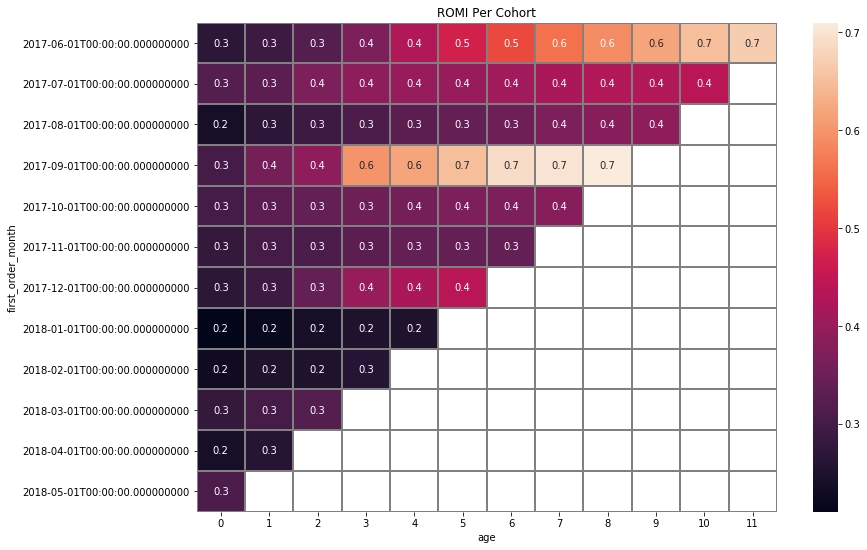

In [127]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(13, 9))
plt.title('ROMI Per Cohort')
sns.heatmap(output_graph, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

- The Cohorts did not really pay back for the costs.

## Step 3. Write a conclusion 
- After looking at the different metrics I have concluded that we want to focus on the months of October, November, and December to attract visitors. This is probably because these months are considered big holiday months with Christmas coming and so ordering during those months are big.
- I also would continue to use our marketing source 4 since it brought a nice number of visitors at 83525 which was the most out of any of the sources and its cac at .73 and romi at .70 were very close compared to other sources. 
- Source 1 is the best source to use for marketing as it does have a good return on marketing investment at 2.15 which is more than the other sources.
- Even though it may seem that the Source may have been worthwhile to use we see when looking at Cohorts that the return on investment was not actually good for any of the groups and we probably need to think about our costs acquiring users when we use these sources again.